This map displays the African continent, with each country represented in distinct, earthy colors. The names of the countries are centered within their respective borders for clarity. The minimalist design features a warm off-white background, highlighting the geographical divisions across Africa.

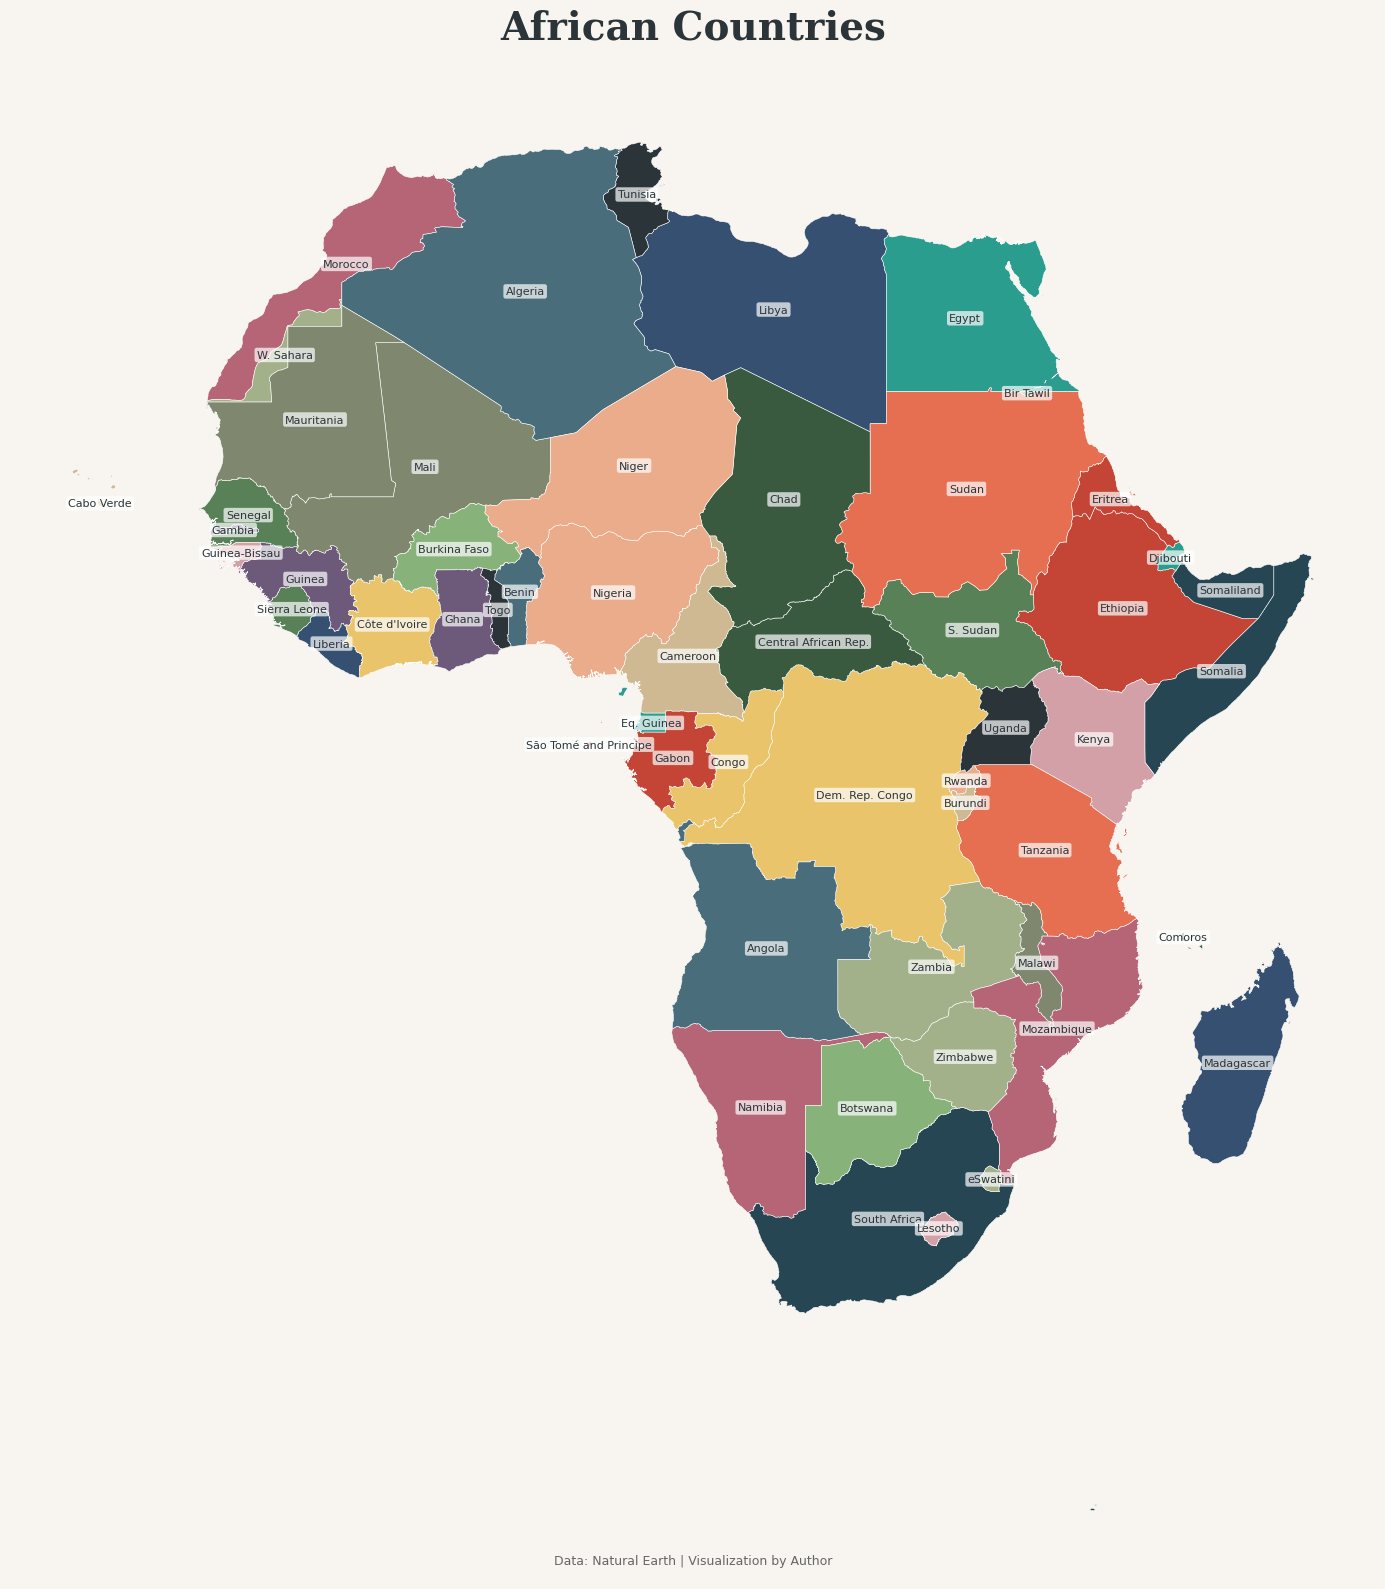

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

warnings.filterwarnings("ignore")

countries_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"
countries = gpd.read_file(countries_url)

africa = countries[countries['CONTINENT'] == 'Africa'].to_crs("EPSG:4326")

colors = [
    "#4A6D7C", "#87B37A", "#CEB992", "#3A5A40", "#E9C46A", "#2A9D8F", 
    "#C44536", "#6D597A", "#D4A0A7", "#355070", "#7F886F", "#B56576", 
    "#EAAC8B", "#588157", "#264653", "#E76F51", "#2A3439", "#A3B18A"
]

fig, ax = plt.subplots(figsize=(18, 16))

africa.plot(
    ax=ax,
    column='NAME',
    cmap=mcolors.ListedColormap(colors),
    edgecolor='white',
    linewidth=0.4,
    legend=False
)

def get_country_center(gdf, country):
    country_data = gdf[gdf['NAME'] == country]
    if country_data.empty:
        return None
    geom = country_data.geometry.union_all()
    if geom.geom_type == 'MultiPolygon':
        return max(geom.geoms, key=lambda p: p.area).centroid
    return geom.centroid

for country in africa['NAME'].unique():
    center = get_country_center(africa, country)
    if center is None:
        continue
    
    x, y = center.x, center.y
    ax.text(
        x, y, country,
        fontsize=8,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        color='#2a3439',
        bbox=dict(
            facecolor='white',
            alpha=0.7,
            edgecolor='none',
            boxstyle='round,pad=0.2'
        )
    )

fig.patch.set_facecolor('#F8F5F0')
ax.set_facecolor('#F8F5F0')
ax.set_title(
    'African Countries',
    fontsize=28,
    pad=25,
    fontweight='bold',
    color='#2A3439',
    fontfamily='serif'
)

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Visualization by Author',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif'
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

This is an interactive map of Africa where each country is colored based on its population size. By using the checkboxes on the right, I can toggle the visibility of different countries on the map, allowing for a customized view of the continent. The population legend at the bottom helps to categorize countries into small, medium, and large populations, making it easy to understand the demographic distribution across Africa.

In [2]:
import folium
import geopandas as gpd
import random

countries_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"
countries = gpd.read_file(countries_url)

africa = countries[countries['CONTINENT'] == 'Africa'].to_crs("EPSG:4326")

colors = [
    "#4A6D7C", "#87B37A", "#CEB992", "#3A5A40", "#E9C46A", "#2A9D8F",
    "#C44536", "#6D597A", "#D4A0A7", "#355070", "#7F886F", "#B56576",
    "#EAAC8B", "#588157", "#264653", "#E76F51", "#2A3439", "#A3B18A"
]
random.shuffle(colors)

m = folium.Map(
    location=[6.6111, 20.9394],
    zoom_start=3,
    tiles='CartoDB positron',
    control_scale=True
)

for idx, country_name in enumerate(africa['NAME'].unique()):
    country_data = africa[africa['NAME'] == country_name]
    
    folium.GeoJson(
        country_data,
        name=country_name,
        show=(idx < 10),
        style_function=lambda feature, idx=idx: {
            'fillColor': colors[idx % len(colors)],
            'color': 'white',
            'weight': 0.5,
            'fillOpacity': 0.7
        },
        tooltip=folium.features.GeoJsonTooltip(
            fields=['NAME', 'POP_EST'],
            aliases=['Country: ', 'Population: '],
            localize=True,
            sticky=True
        )
    ).add_to(m)

title_html = '''
     <h3 align="center" style="font-size:16px"><b>African Countries Map</b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

folium.LayerControl(collapsed=False).add_to(m)

legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 90px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white;
                 ">
         <p style="margin:5px"><b>Population Legend</b></p>
         <p style="margin:5px">🇸 Small: <5M</p>
         <p style="margin:5px">🇲 Medium: 5-20M</p>
         <p style="margin:5px">🇱 Large: >20M</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

m

This map visualizes the administrative regions of Ethiopia, with each region color-coded using a natural earth tone palette. The coding logic involves reading geographical data for Ethiopia's regions, applying a color palette, and then plotting each region with labels centered in their respective areas. The map includes enhanced label visibility with a black background and white text for better readability, and a clean, warm off-white background to emphasize the regions.

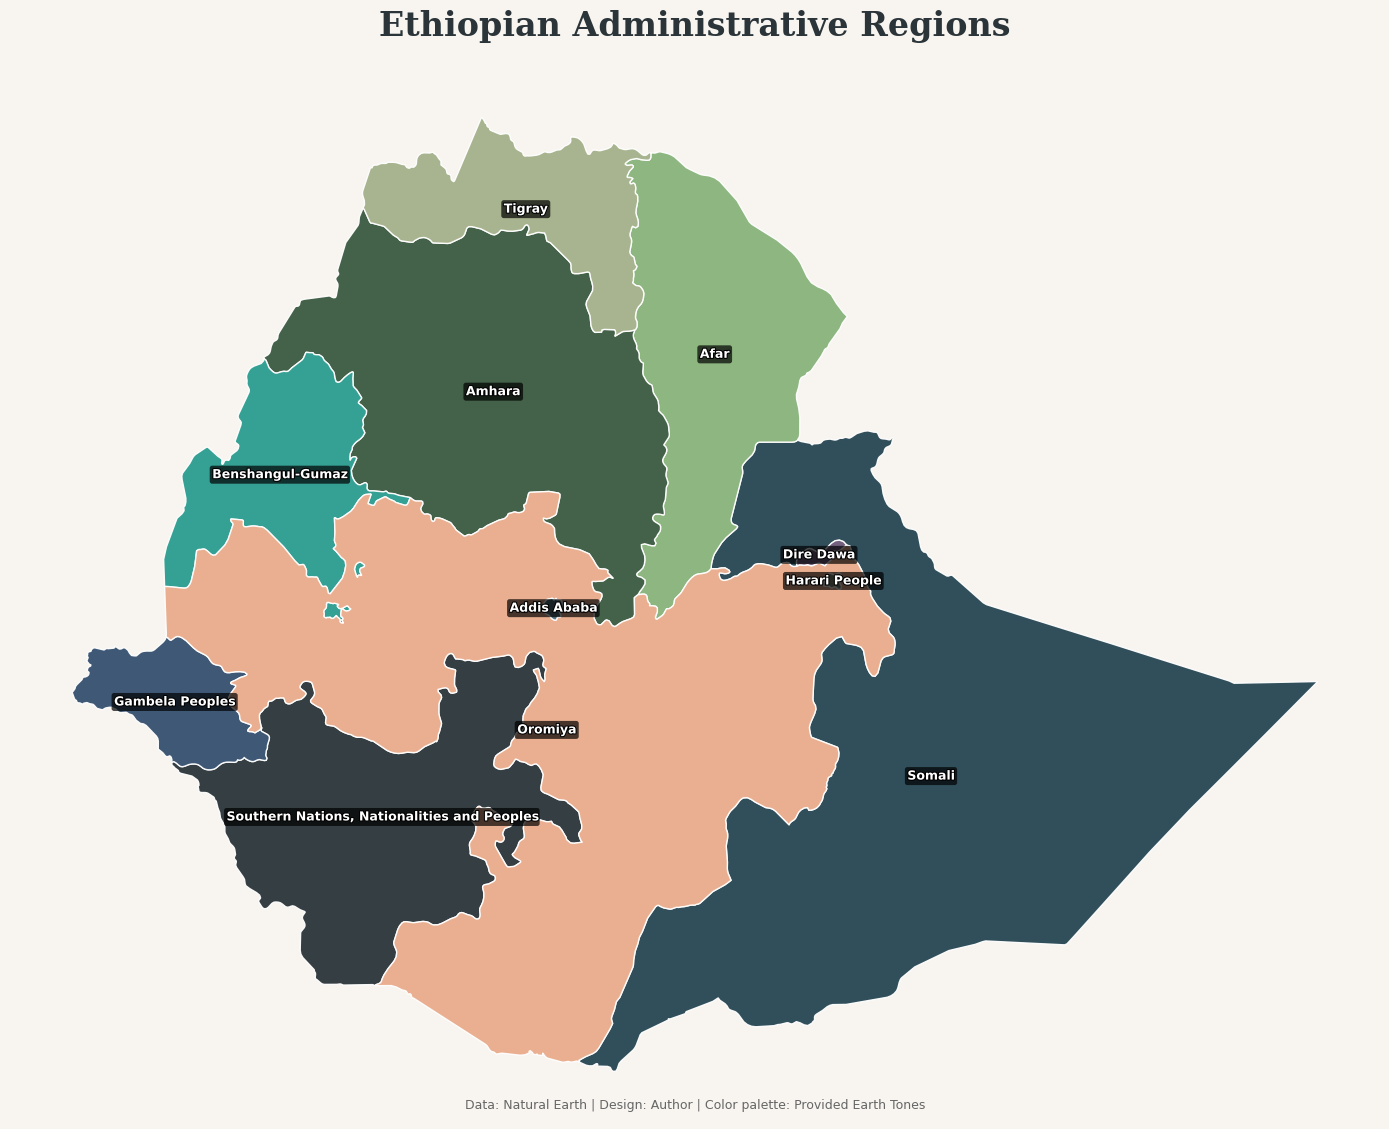

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

ethiopia = admin1[admin1['admin'] == 'Ethiopia'].to_crs("EPSG:32637")

fig, ax = plt.subplots(figsize=(14, 16))

colors = [
    "#4A6D7C", "#87B37A", "#CEB992", "#3A5A40", "#E9C46A", "#2A9D8F", 
    "#C44536", "#6D597A", "#D4A0A7", "#355070", "#7F886F", "#B56576", 
    "#EAAC8B", "#588157", "#264653", "#E76F51", "#2A3439", "#A3B18A"
]

cmap = mcolors.ListedColormap(colors)

ethiopia.plot(
    ax=ax,
    column='name',
    cmap=cmap,
    edgecolor='white',
    linewidth=1.0,
    alpha=0.95,
    categorical=True,
    legend=False
)

for x, y, label in zip(ethiopia.geometry.centroid.x,
                       ethiopia.geometry.centroid.y,
                       ethiopia['name']):
    ax.text(
        x, y, label,
        fontsize=9,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='white',
        bbox=dict(
            facecolor='black',
            alpha=0.7,
            edgecolor='none',
            boxstyle='round,pad=0.2',
            linewidth=0
        ),
        path_effects=[path_effects.withStroke(linewidth=1.5, foreground="black")]
    )

ax.set_title(
    'Ethiopian Administrative Regions',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

fig.patch.set_facecolor('#F8F5F0')
ax.set_facecolor('#F8F5F0')

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Design: Author | Color palette: Provided Earth Tones',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#F8F5F0',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

This is an interactive map showing the administrative regions of Ethiopia, each colored differently using a shuffled color palette. The code loads Ethiopia's regional data, applies colors, and adds interactive features such as tooltips with region names and types. The map also includes a legend and layer control for better interaction and understanding of the regions.

In [4]:
import folium
import geopandas as gpd
import random

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

ethiopia = admin1[admin1['admin'] == 'Ethiopia']
ethiopia = ethiopia.to_crs("EPSG:4326")

colors = [
    "#4A6D7C", "#87B37A", "#CEB992", "#3A5A40", "#E9C46A", "#2A9D8F", 
    "#C44536", "#6D597A", "#D4A0A7", "#355070", "#7F886F", "#B56576", 
    "#EAAC8B", "#588157", "#264653", "#E76F51", "#2A3439", "#A3B18A"
]
random.shuffle(colors)

m = folium.Map(
    location=[9.145, 40.4897],
    zoom_start=6,
    tiles='CartoDB positron',
    control_scale=True
)

folium.GeoJson(
    ethiopia,
    name='Ethiopian Regions',
    style_function=lambda feature: {
        'fillColor': colors.pop(),
        'color': 'white',
        'weight': 0.8,
        'fillOpacity': 0.7
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name', 'type'],
        aliases=['Region:', 'Type:'],
        localize=True,
        sticky=True
    )
).add_to(m)

title_html = '''
     <h3 align="center" style="font-size:18px; margin:5px">
         <b>Ethiopian Administrative Regions</b>
     </h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

folium.LayerControl(collapsed=False).add_to(m)

legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; 
                 width: 160px; height: 110px; 
                 border:2px solid grey; z-index:9999; 
                 font-size:12px; background-color:white;
                 padding:5px">
         <p style="margin:2px"><b>Legend</b></p>
         <p style="margin:2px">🟦 Regional State</p>
         <p style="margin:2px">🟨 Chartered City</p>
         <p style="margin:2px">🌐 Source: Natural Earth</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

m

The map highlights the Tigray region in Ethiopia while displaying the rest of the country in grey. The code uses a colormap to assign a red color to Tigray and grey to other regions, then labels only Tigray with bold white text for emphasis. The map provides a clean, minimalist background with clear titles and attributions to give context to the data.

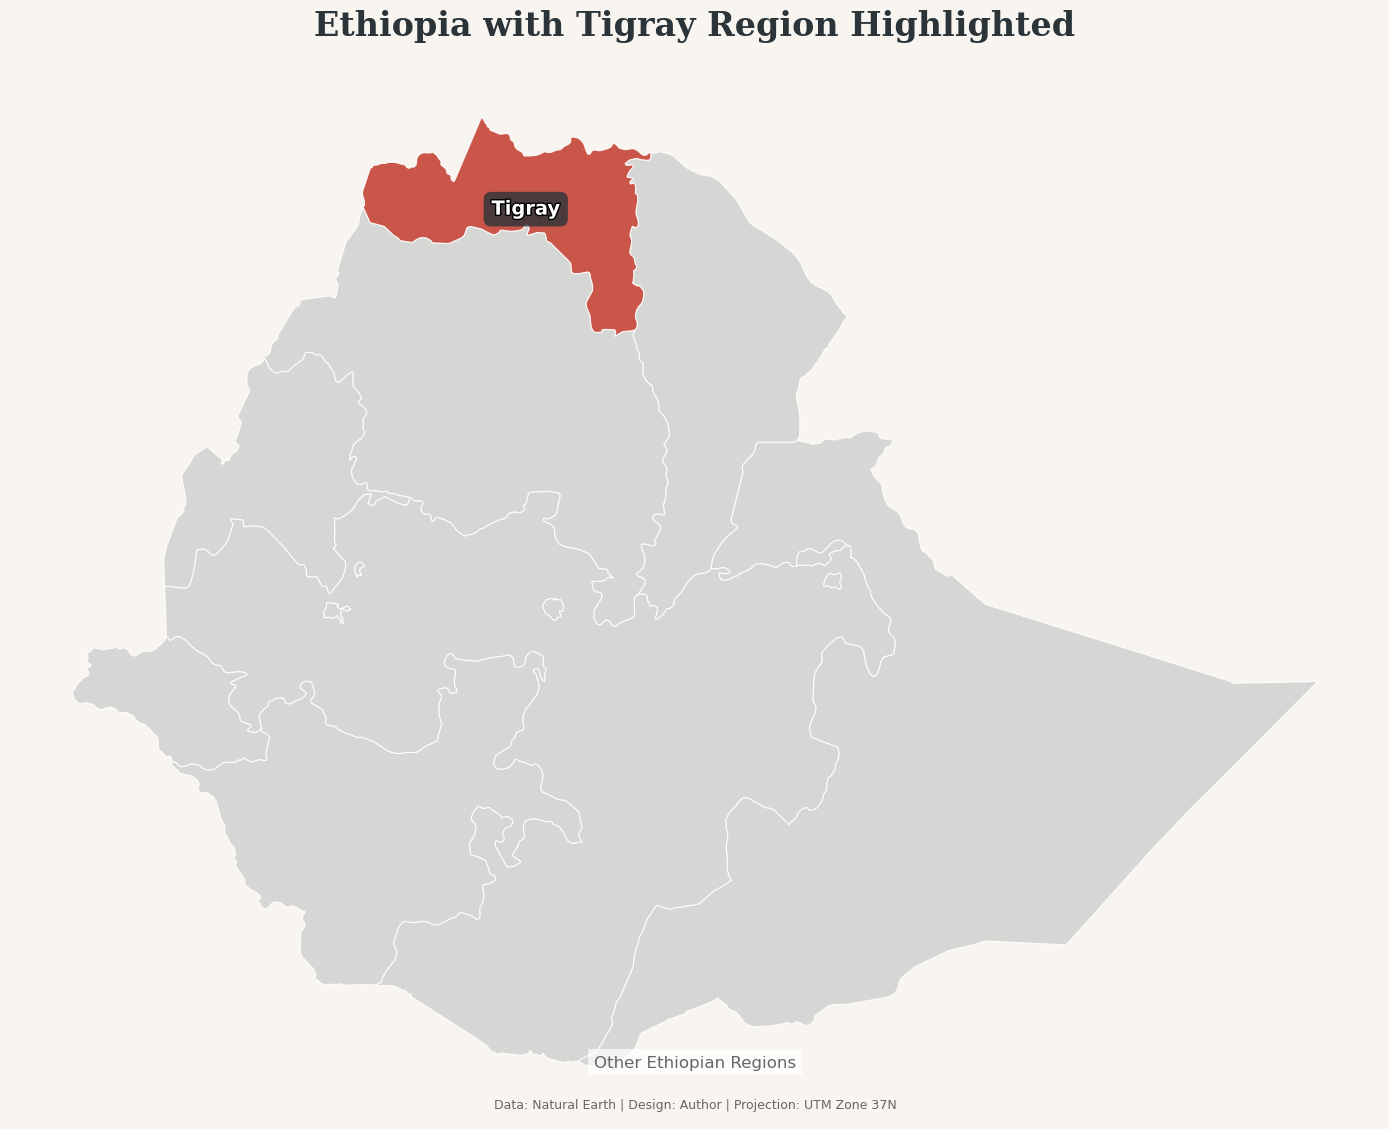

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

ethiopia = admin1[admin1['admin'] == 'Ethiopia'].to_crs("EPSG:32637")
tigray = ethiopia[ethiopia['name'] == 'Tigray']

fig, ax = plt.subplots(figsize=(14, 16))

cmap = mcolors.ListedColormap(['#D3D3D3', '#C44536'])

ethiopia.plot(
    ax=ax,
    column=(ethiopia['name'] == 'Tigray').astype(int),  
    cmap=cmap,
    edgecolor='white',
    linewidth=0.8,
    alpha=0.9,
    categorical=True,
    legend=False
)

for x, y, label in zip(tigray.geometry.centroid.x,
                       tigray.geometry.centroid.y,
                       tigray['name']):
    ax.text(
        x, y, label,
        fontsize=14,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='white',
        bbox=dict(
            facecolor='#2A3439',
            alpha=0.8,
            edgecolor='none',
            boxstyle='round,pad=0.4',
            linewidth=0
        ),
        path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
    )

ax.set_title(
    'Ethiopia with Tigray Region Highlighted',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

ax.text(
    0.5, 0.05,
    'Other Ethiopian Regions',
    transform=ax.transAxes,
    fontsize=12,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='white',
        alpha=0.7,
        edgecolor='none',
        pad=4
    )
)

fig.patch.set_facecolor('#F8F5F0')
ax.set_facecolor('#F8F5F0')

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Design: Author | Projection: UTM Zone 37N',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#F8F5F0',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

This map highlights the Amhara region of Ethiopia by coloring it in red, while the rest of the country is shown in grey. The code filters Ethiopia’s administrative regions, then uses a colormap to apply distinct colors for the Amhara region and the rest. Additionally, the name "Amhara" is displayed in bold white text, enhancing its visibility on the map.

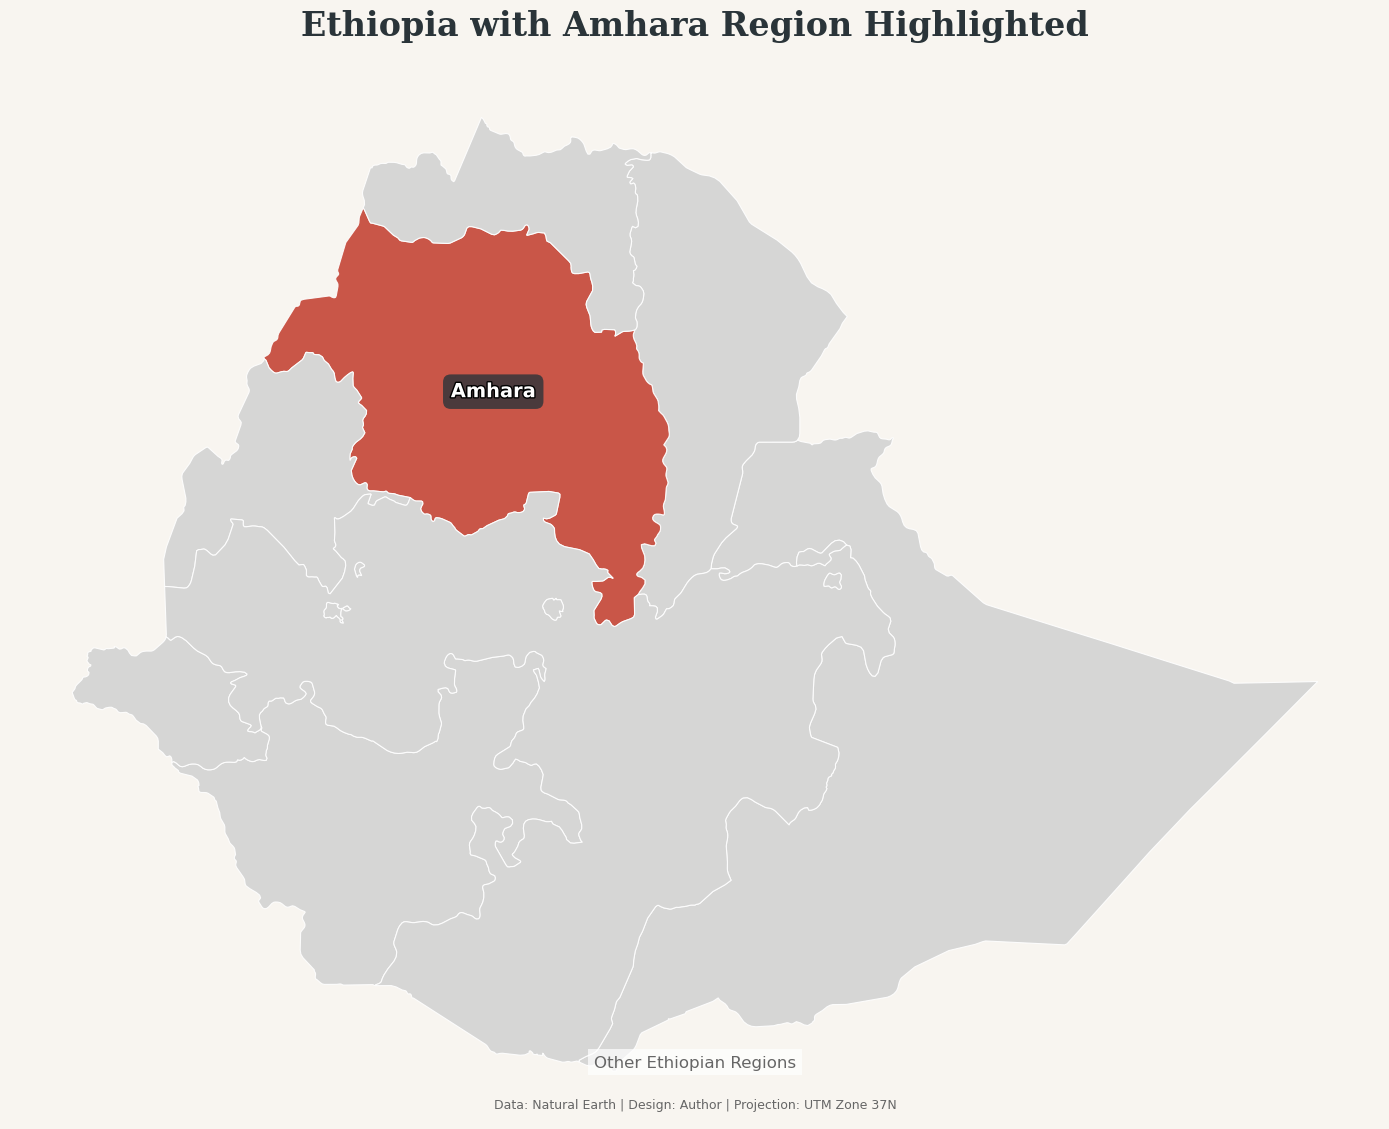

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

ethiopia = admin1[admin1['admin'] == 'Ethiopia'].to_crs("EPSG:32637")
amhara = ethiopia[ethiopia['name'] == 'Amhara']

fig, ax = plt.subplots(figsize=(14, 16))

cmap = mcolors.ListedColormap(['#D3D3D3', '#C44536'])

ethiopia.plot(
    ax=ax,
    column=(ethiopia['name'] == 'Amhara').astype(int),  
    cmap=cmap,
    edgecolor='white',
    linewidth=0.8,
    alpha=0.9,
    categorical=True,
    legend=False
)

for x, y, label in zip(amhara.geometry.centroid.x,
                       amhara.geometry.centroid.y,
                       amhara['name']):
    ax.text(
        x, y, label,
        fontsize=14,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='white',
        bbox=dict(
            facecolor='#2A3439',
            alpha=0.8,
            edgecolor='none',
            boxstyle='round,pad=0.4',
            linewidth=0
        ),
        path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
    )

ax.set_title(
    'Ethiopia with Amhara Region Highlighted',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

ax.text(
    0.5, 0.05,
    'Other Ethiopian Regions',
    transform=ax.transAxes,
    fontsize=12,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='white',
        alpha=0.7,
        edgecolor='none',
        pad=4
    )
)

fig.patch.set_facecolor('#F8F5F0')
ax.set_facecolor('#F8F5F0')

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Design: Author | Projection: UTM Zone 37N',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#F8F5F0',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

This map highlights the Oromiya region of Ethiopia in red, with all other regions displayed in grey. The code filters the regions to isolate Oromiya, applying a red color to it while leaving the rest of the country in grey. The label "Oromiya" is centered within the highlighted region to ensure visibility.

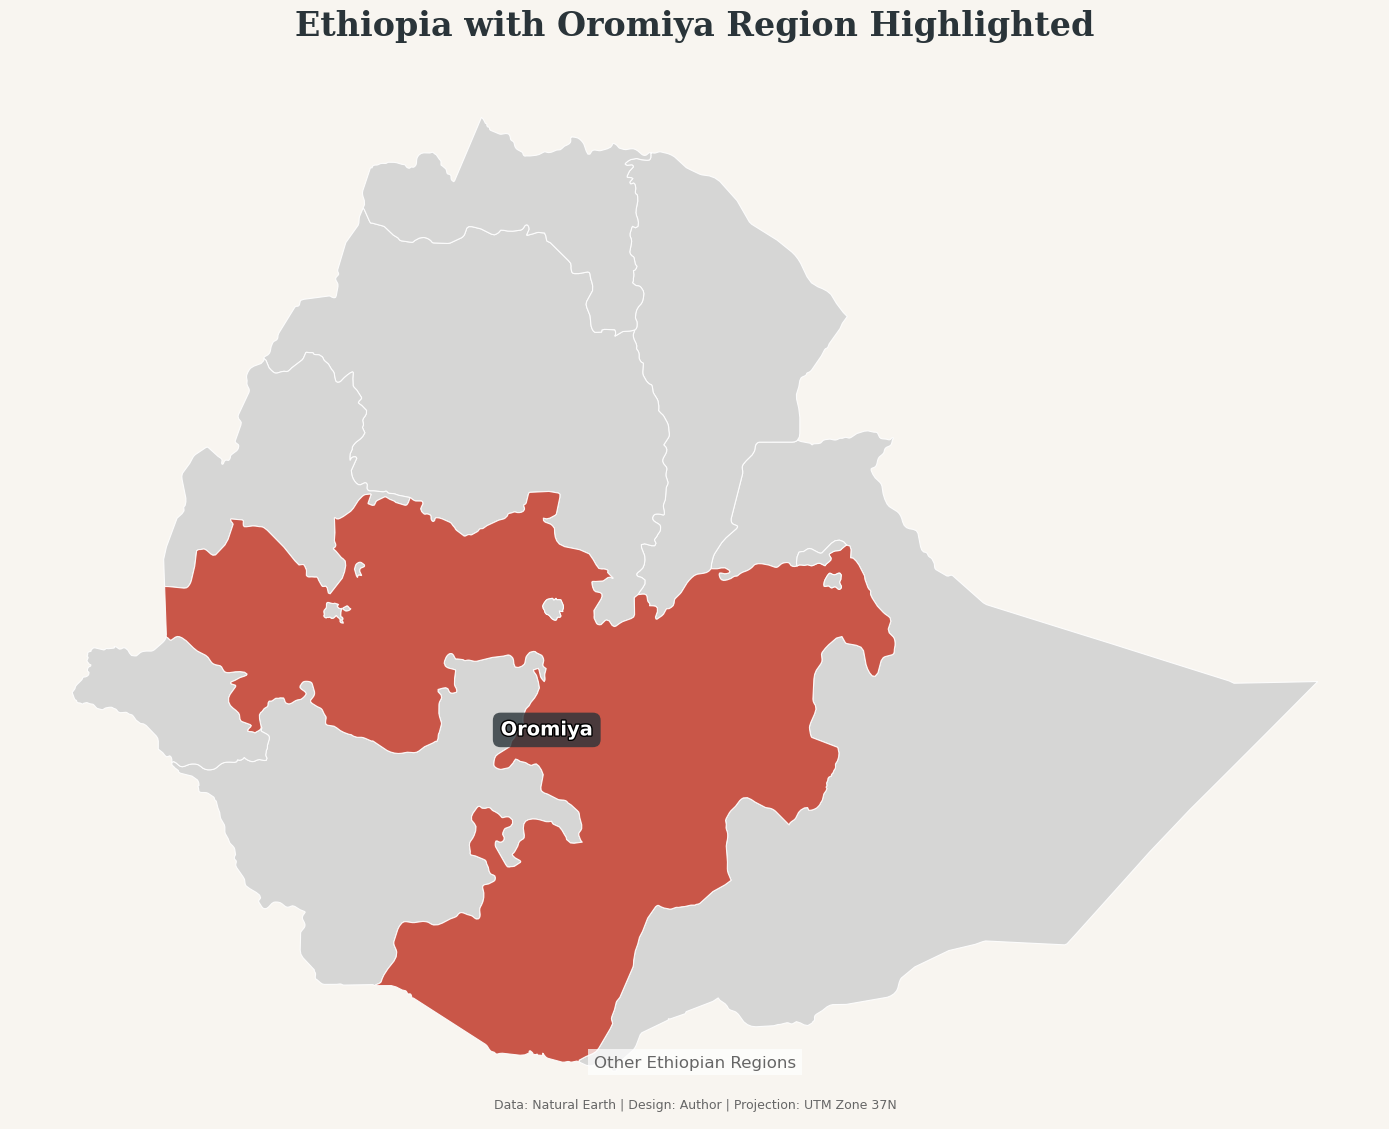

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

admin1_url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip"
admin1 = gpd.read_file(admin1_url)

ethiopia = admin1[admin1['admin'] == 'Ethiopia'].to_crs("EPSG:32637")
oromiya = ethiopia[ethiopia['name'] == 'Oromiya']

fig, ax = plt.subplots(figsize=(14, 16))

cmap = mcolors.ListedColormap(['#D3D3D3', '#C44536'])

ethiopia.plot(
    ax=ax,
    column=(ethiopia['name'] == 'Oromiya').astype(int),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.8,
    alpha=0.9,
    categorical=True,
    legend=False
)

for x, y in zip(oromiya.geometry.centroid.x,
                oromiya.geometry.centroid.y):
    ax.text(
        x, y, 'Oromiya',
        fontsize=14,
        ha='center',
        va='center',
        fontfamily='sans-serif',
        fontweight='bold',
        color='white',
        bbox=dict(
            facecolor='#2A3439',
            alpha=0.8,
            edgecolor='none',
            boxstyle='round,pad=0.4',
            linewidth=0
        ),
        path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
    )

ax.set_title(
    'Ethiopia with Oromiya Region Highlighted',
    fontsize=24,
    pad=25,
    fontweight='bold',
    color='#2a3439',
    fontfamily='serif'
)

ax.text(
    0.5, 0.05,
    'Other Ethiopian Regions',
    transform=ax.transAxes,
    fontsize=12,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='white',
        alpha=0.7,
        edgecolor='none',
        pad=4
    )
)

fig.patch.set_facecolor('#F8F5F0')
ax.set_facecolor('#F8F5F0')

ax.text(
    0.5, 0.01,
    'Data: Natural Earth | Design: Author | Projection: UTM Zone 37N',
    transform=ax.transAxes,
    fontsize=9,
    color='#666666',
    ha='center',
    fontfamily='sans-serif',
    bbox=dict(
        facecolor='#F8F5F0',
        alpha=0.8,
        edgecolor='none',
        pad=4
    )
)

ax.set_axis_off()
plt.tight_layout()
plt.show()